<h1 align="center">Deep_Learning_project_Update</h1> 

# 
  #### Team:
    1)Anil Kumar
    2)Rakesh Kumar
        
   ## Data collection:
           we have obtained the data from the surrounding of the campus total collected samples are 127 images and annotated using removebg tools which we took reference from research paper 
   #### Resizing the images:
           The transform parameter is used to resize the images to 256x256 and convert them to tensor format using the transforms.Compose function from the torchvision.transforms module.
           
   ## Creating custom data set:
           The dataset is defined by the CustomDataset class, which inherits from PyTorch's Dataset class. The constructor takes two arguments, root_dir_images and root_dir_annotations, which are the paths to the directories containing the images and their annotations respectively. The optional argument transform is used to apply transformations to the images and annotations.
           
   ## spliting the dataset in train, test and valadiation:
           The dataset is partitioned into train, validation, and test sets using random indices generated using the list(range(dataset_size)) command. The dataset is shuffled using random.shuffle(indices), and the first 80% of the shuffled indices are assigned to the train set, the next 10% to the validation set, and the remaining 10% to the test set.
           Finally, three data loaders are created using the DataLoader class from the torch.utils.data module with each data loader using the corresponding subset sampler. The data loaders are used to load the data in batches of size 8.
   ## Displying the 1st sample image of each minibatch of size 8
            The code also includes a loop to display the first image and annotation for each batch of size 8 from the training data loader using the next(iter(train_loader)) function to retrieve a single batch and the enumerate function to loop through all batches.

<h1 align="left">table of content</h1> 
<h3 align="left">Dataset</h3> 
<h3 align="left">Transfer Learning</h3> 
<h3 align="left">Pre-Trained model analysis</h3> 
<h3 align="left">Mini Network</h3> 
<h3 align="left">Deployment</h3> 

In [1]:
import os
import random
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
import torch
import matplotlib.pyplot as plt
import numpy as np

#### Creating CustomDataset

In [2]:
class CustomDataset(Dataset):
    def __init__(self, root_dir_images, root_dir_annotations, transform=None):
        self.root_dir_images = root_dir_images
        self.root_dir_annotations = root_dir_annotations
        self.transform = transform
        self.image_files = sorted(os.listdir(self.root_dir_images))
        self.annotation_files = sorted(os.listdir(self.root_dir_annotations))
        assert len(self.image_files) == len(self.annotation_files), "Number of images and annotations don't match"
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir_images, self.image_files[idx])
        annotation_path = os.path.join(self.root_dir_annotations, self.annotation_files[idx])
        img = Image.open(img_path).convert('RGB')
        annotation = Image.open(annotation_path).convert('RGB')
        if self.transform:
            img = self.transform(img)
            annotation = self.transform(annotation)
        return img, annotation

#### Set up paths to image and annotation directories

In [3]:
root_dir_images = "/Users/rakeshkumar/Documents/collage/3_SEM/Deep_Learning/project/Data_set/data_images"
root_dir_annotations = "/Users/rakeshkumar/Documents/collage/3_SEM/Deep_Learning/project/Data_set/annotated_images"

#### Resize all images to 256x256 

In [4]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

#### Create dataset object

In [5]:
dataset = CustomDataset(root_dir_images, root_dir_annotations, transform)

#### Partition dataset into train, val, test

In [6]:
dataset_size = len(dataset)
indices = list(range(dataset_size))
split1, split2 = int(0.8 * dataset_size), int(0.9 * dataset_size)
random.shuffle(indices)
train_indices, val_indices, test_indices = indices[:split1], indices[split1:split2], indices[split2:]

In [7]:
train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)
test_sampler = torch.utils.data.SubsetRandomSampler(test_indices)

train_loader = DataLoader(dataset, batch_size=8, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=8, sampler=val_sampler)
test_loader = DataLoader(dataset, batch_size=8, sampler=test_sampler)

#### Print 1 sample from both image and annotation loaders and 

In [8]:
img, annotation = next(iter(train_loader))
print("Sample image shape:", img[0].shape)
print("Sample annotation shape:", annotation[0].shape)

Sample image shape: torch.Size([3, 256, 256])
Sample annotation shape: torch.Size([3, 256, 256])


#### Display the first sample image of each minibatch of size 8

In [9]:
for batch_idx, (img_batch, annotation_batch) in enumerate(train_loader):
    print("Batch", batch_idx+1, ":")
    print("First image shape:", img_batch[0].shape)
    print("First annotation shape:", annotation_batch[0].shape)

Batch 1 :
First image shape: torch.Size([3, 256, 256])
First annotation shape: torch.Size([3, 256, 256])
Batch 2 :
First image shape: torch.Size([3, 256, 256])
First annotation shape: torch.Size([3, 256, 256])
Batch 3 :
First image shape: torch.Size([3, 256, 256])
First annotation shape: torch.Size([3, 256, 256])
Batch 4 :
First image shape: torch.Size([3, 256, 256])
First annotation shape: torch.Size([3, 256, 256])
Batch 5 :
First image shape: torch.Size([3, 256, 256])
First annotation shape: torch.Size([3, 256, 256])
Batch 6 :
First image shape: torch.Size([3, 256, 256])
First annotation shape: torch.Size([3, 256, 256])
Batch 7 :
First image shape: torch.Size([3, 256, 256])
First annotation shape: torch.Size([3, 256, 256])
Batch 8 :
First image shape: torch.Size([3, 256, 256])
First annotation shape: torch.Size([3, 256, 256])
Batch 9 :
First image shape: torch.Size([3, 256, 256])
First annotation shape: torch.Size([3, 256, 256])
Batch 10 :
First image shape: torch.Size([3, 256, 256])

#### Dispalying the sample images of train_dataset

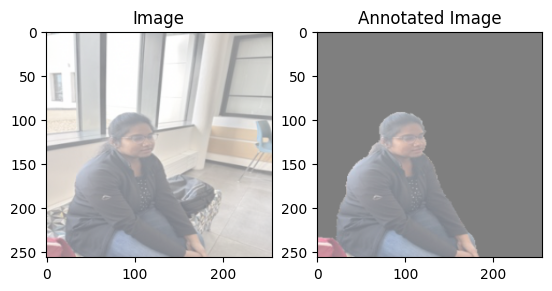

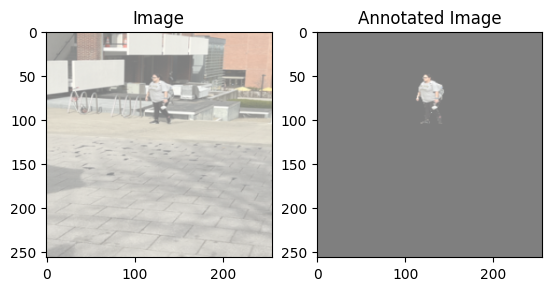

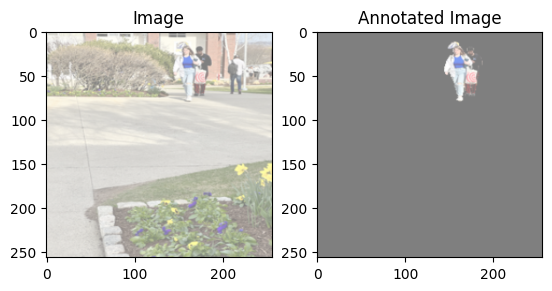

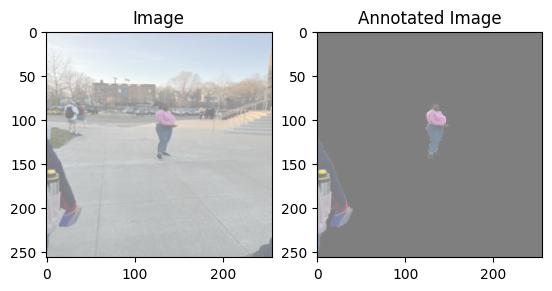

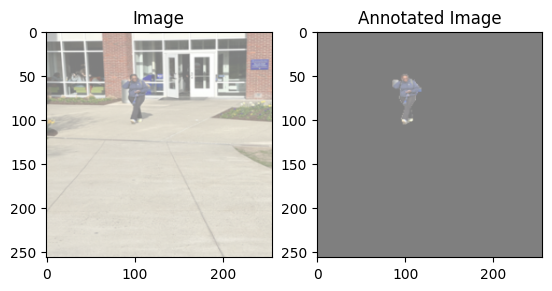

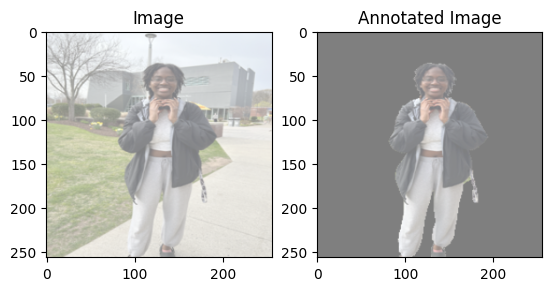

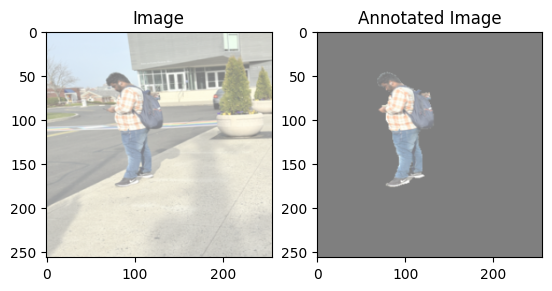

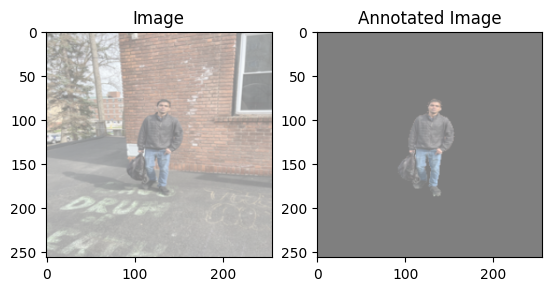

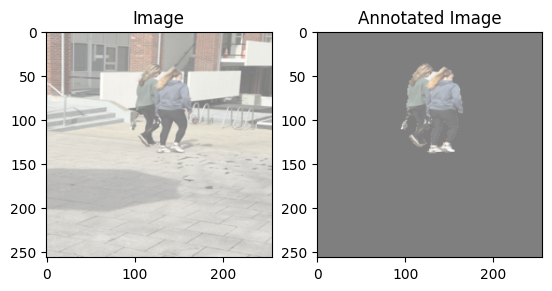

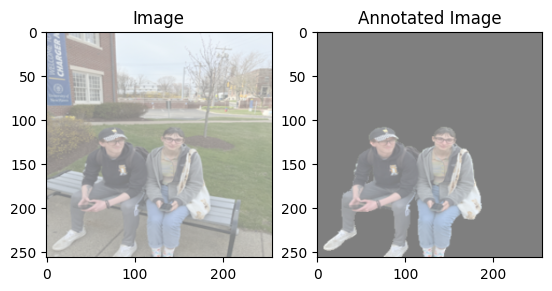

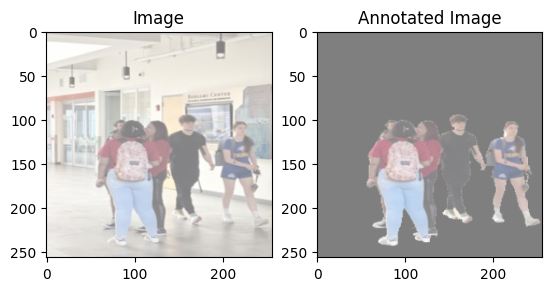

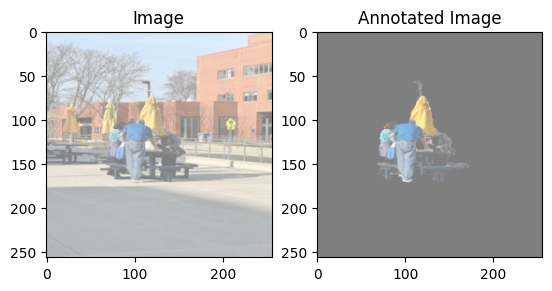

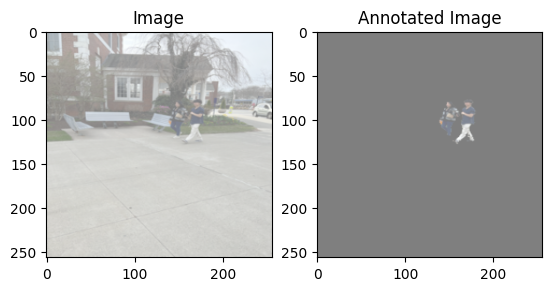

In [10]:
for i, (images, labels) in enumerate(train_loader):
    # get the first image from the batch
    image = images[0]
    label = labels[0]
    
    # denormalize the image tensor and convert to numpy array
    image = image.permute(1, 2, 0).numpy()
    image = (image * 0.5) + 0.5
    
    # denormalize the label tensor and convert to numpy array
    label = label.permute(1, 2, 0).numpy()
    label = (label * 0.5) + 0.5
    
    # plot the images side by side
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image')
    plt.axis('on')
    
    plt.subplot(1, 2, 2)
    plt.imshow(label)
    plt.title('Annotated Image')
    plt.axis('on')
    
    plt.show()

#### Dispalying the sample images of Validation dataset 

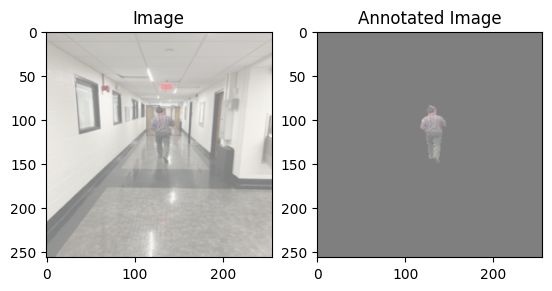

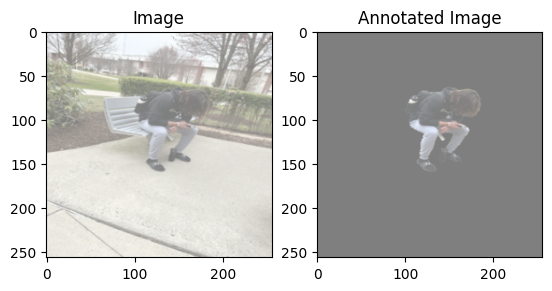

In [27]:
for i, (images, labels) in enumerate(val_loader):
    # get the first image from the batch
    image = images[0]
    label = labels[0]
    
    # denormalize the image tensor and convert to numpy array
    image = image.permute(1, 2, 0).numpy()
    image = (image * 0.5) + 0.5
    
    # denormalize the label tensor and convert to numpy array
    label = label.permute(1, 2, 0).numpy()
    label = (label * 0.5) + 0.5
    
    # plot the images side by side
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image')
    plt.axis('on')
    
    plt.subplot(1, 2, 2)
    plt.imshow(label)
    plt.title('Annotated Image')
    plt.axis('on')
    
    plt.show()

#### Dispalying the sample images of Test dataset 

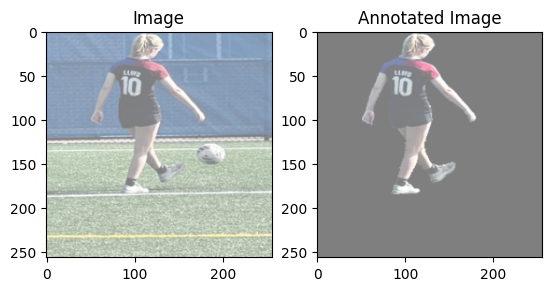

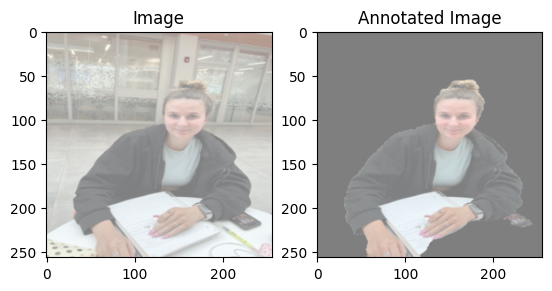

In [115]:
for i, (images, labels) in enumerate(test_loader):
    # get the first image from the batch
    image = images[0]
    label = labels[0]
    
    # denormalize the image tensor and convert to numpy array
    image = image.permute(1, 2, 0).numpy()
    image = (image * 0.5) + 0.5
    
    # denormalize the label tensor and convert to numpy array
    label = label.permute(1, 2, 0).numpy()
    label = (label * 0.5) + 0.5
    
    # plot the images side by side
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Image')
    plt.axis('on')
    
    plt.subplot(1, 2, 2)
    plt.imshow(label)
    plt.title('Annotated Image')
    plt.axis('on')
    
    plt.show()

# Update_2

In [10]:
import torchvision
from torchvision.models.segmentation.deeplabv3 import DeepLabHead
from torchvision import models

In [11]:
# import torchvision
# from torchvision.models.detection import maskrcnn_resnet50_fpn

In [33]:
# Define the pre-trained model
model = torch.hub.load('pytorch/vision:v0.9.0', 'deeplabv3_resnet101', pretrained=True)

# Modify the last convolutional layer to output 3 channels instead of 21
model.classifier[-1] = torch.nn.Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))

# Define the device to train on
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Send the model to the device
model.to(device)

Using cache found in /Users/rakeshkumar/.cache/torch/hub/pytorch_vision_v0.9.0


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [13]:
import torch.nn as nn
import torch.optim as optim

# # Initialize the model and move it to the GPU if available
# model = createDeepLabv3(outputchannels=3)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# Define the loss function and optimizer$
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.7)

##  Dice loss function

In [14]:
class DiceLoss(torch.nn.Module):
    def __init__(self):
        super(DiceLoss, self).__init__()

    def forward(self, inputs, targets, smooth=1):
        # Flatten the inputs and targets tensors
        inputs = inputs.flatten()
        targets = targets.flatten()

        # Compute the intersection and union
        intersection = (inputs * targets).sum()
        union = inputs.sum() + targets.sum()

        # Compute the Dice coefficient
        dice_coefficient = (2 * intersection + smooth) / (union + smooth)

        # Compute the Dice loss
        dice_loss = dice_coefficient

        return dice_loss

In [15]:
# Define learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [16]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Training the model

In [17]:
# validation the model for the specified number of epochs
num_epochs= 4
t_loss = [] 
for epoch in range(num_epochs):
    train_loss = 0.0
    correct_pixels = 0
    total_pixels = 0

    # Set the model to eval model
    model.train()

    # Loop over the mini-batches of the Validation data
    for batch_idx, (images, masks) in enumerate(train_loader):
        # Move the images and masks to the GPU if available
        images = images.to(device)
        masks = masks.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)['out']

        # Calculate the loss
        loss = criterion(outputs, masks.argmax(dim=1))

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

        # Calculate the number of correctly classified pixels and total pixels
        _, predicted = torch.max(outputs, 1)
        correct_pixels += (predicted == masks.argmax(dim=1)).sum().item()
        total_pixels += torch.numel(masks)

        # Calculate the training loss
        train_loss += loss.item()

    # Calculate the training accuracy
    train_accuracy = correct_pixels / total_pixels

    # Normalize the training loss by the number of mini-batches
    train_loss /= len(train_loader)
    t_loss.append(train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

Epoch 1/4, Train Loss: 0.6192, Train Accuracy: 0.2841
Epoch 2/4, Train Loss: 0.2783, Train Accuracy: 0.3101
Epoch 3/4, Train Loss: 0.1958, Train Accuracy: 0.3126
Epoch 4/4, Train Loss: 0.1514, Train Accuracy: 0.3169


In [20]:
# Validate the model for the specified number of epochs
num_epochs = 4
t_loss = []
for epoch in range(num_epochs):
    train_loss = 0.0
    correct_pixels = 0
    total_pixels = 0

    # Set the model to eval mode
    model.train()

    # Loop over the mini-batches of the Validation data
    for batch_idx, (images, masks) in enumerate(train_loader):
        # Move the images and masks to the GPU if available
        images = images.to(device)
        masks = masks.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)['out']

        # Calculate the loss
        loss = criterion(outputs, masks.argmax(dim=1))

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

        # Calculate the number of correctly classified pixels and total pixels
        _, predicted = torch.max(outputs, 1)
        correct_pixels += (predicted == masks.argmax(dim=1)).sum().item()
        total_pixels += torch.numel(masks)

        # Calculate the training loss
        train_loss += loss.item()

    # Calculate the training accuracy
    train_accuracy = correct_pixels / total_pixels

    # Normalize the training loss by the number of mini-batches
    train_loss /= len(train_loader)
    t_loss.append(train_loss)

    # Step the learning rate scheduler
    lr_scheduler.step()
    

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Current Learning Rate: {lr_scheduler.get_last_lr()[0]:.6f}")
    
    #saving the best model.
    if train_accuracy > best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')

In [21]:
x_loss = [0.6192,0.2783,0.1958,0.1514] # imported losses from previous losses for the model.

In [22]:
max(x_loss)  #displaying the max loss obtained for the model.

0.6192

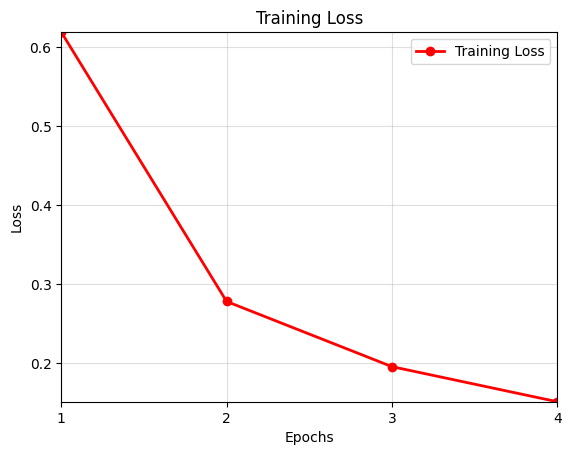

In [25]:
import matplotlib.pyplot as plt


# Plot the training loss
plt.plot(x_loss, marker='o', linestyle='-', linewidth=2, markersize=6, color='red', label='Training Loss')

# Add a title
plt.title('Training Loss')

# Add x and y labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a grid
plt.grid(alpha=0.4)

# Add a legend
plt.legend()

# Customize the plot's appearance
plt.xticks(range(len(x_loss)), [str(x) for x in range(1, len(x_loss) + 1)])


# Set the axis limits
plt.xlim(0, len(x_loss)-1)
plt.ylim(min(x_loss), max(x_loss))

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t_loss)
plt.show()

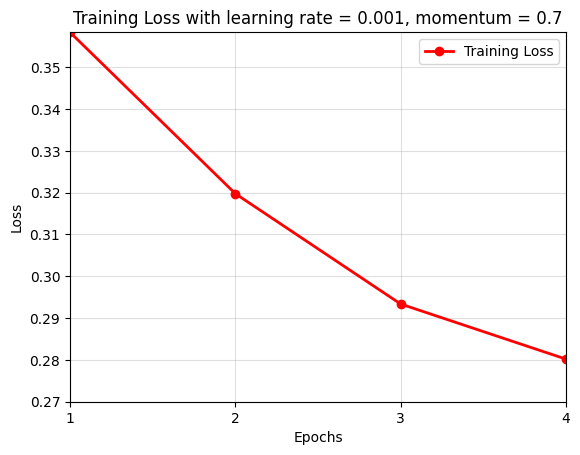

In [24]:
import matplotlib.pyplot as plt


# Plot the training loss
plt.plot(t_loss, marker='o', linestyle='-', linewidth=2, markersize=6, color='red', label='Training Loss')

# Add a title
plt.title('Training Loss ')

# Add x and y labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a grid
plt.grid(alpha=0.4)

# Add a legend
plt.legend()

# Customize the plot's appearance
plt.xticks(range(len(t_loss)), [str(x) for x in range(1, len(t_loss) + 1)])


# Set the axis limits
plt.xlim(0, len(t_loss)-1)
plt.ylim(0.2700, 0.3584)

# Show the plot
plt.show()

In [26]:
print(f"Image shape: {images.shape}")
print(f"Mask shape: {masks.shape}")
print(f"Predicted mask shape: {predicted.shape}")

Image shape: torch.Size([5, 3, 256, 256])
Mask shape: torch.Size([5, 3, 256, 256])
Predicted mask shape: torch.Size([5, 256, 256])


In [ ]:
outputs

In [61]:
# validation the model for the specified number of epochs
num_epochs= 4
v_loss = [] 
for epoch in range(num_epochs):
    train_loss = 0.0
    correct_pixels = 0
    val_loss = 0
    total_pixels = 0

    # Set the model to eval mode
    model.eval()

    # Loop over the mini-batches of the Validation data
    for batch_idx, (images, masks) in enumerate(val_loader):
        # Move the images and masks to the GPU if available
        images = images.to(device)
        masks = masks.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)['out']

        # Calculate the loss
        loss = criterion(outputs, masks.argmax(dim=1))

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

        # Calculate the number of correctly classified pixels and total pixels
        _, predicted = torch.max(outputs, 1)
        correct_pixels += (predicted == masks.argmax(dim=1)).sum().item()
        total_pixels += torch.numel(masks)

        # Calculate the training loss
        val_loss += loss.item()
        
    # Calculate the training accuracy
    val_accuracy = correct_pixels / total_pixels

    # Normalize the training loss by the number of mini-batches
    val_loss /= len(train_loader)
    t_loss.append(train_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/4, Validation Loss: 0.0388, Validation Accuracy: 0.3048
Epoch 2/4, Validation Loss: 0.0394, Validation Accuracy: 0.3048
Epoch 3/4, Validation Loss: 0.0393, Validation Accuracy: 0.3048
Epoch 4/4, Validation Loss: 0.0388, Validation Accuracy: 0.3047


In [64]:
x_loss = [0.3583579636537112,0.3197611616208003,0.29336420045449185,0.28018507705285]

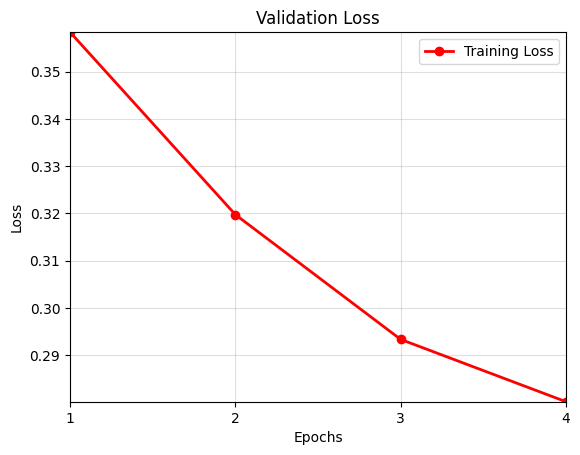

In [65]:
import matplotlib.pyplot as plt


# Plot the training loss
plt.plot(x_loss, marker='o', linestyle='-', linewidth=2, markersize=6, color='red', label='Training Loss')

# Add a title
plt.title('Validation Loss')

# Add x and y labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a grid
plt.grid(alpha=0.4)

# Add a legend
plt.legend()

# Customize the plot's appearance
plt.xticks(range(len(x_loss)), [str(x) for x in range(1, len(x_loss) + 1)])

# Set the axis limits
plt.xlim(0, 4-1)
plt.ylim(min(x_loss), max(x_loss))

# Show the plot
plt.show()

In [49]:
# Check tensor sizes
print(f"Image shape: {images.shape}")
print(f"Mask shape: {masks.shape}")
print(f"Predicted mask shape: {predicted.shape}")

Image shape: torch.Size([5, 3, 256, 256])
Mask shape: torch.Size([5, 3, 256, 256])
Predicted mask shape: torch.Size([5, 256, 256])


In [50]:
# Set the model to evaluation mode
model.eval()

# Disable gradient computation
with torch.no_grad():
    test_loss = 0.0
    test_accuracy = 0.0
    
    for images, masks in test_loader:
        # Move the images and masks to the GPU if available
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        outputs = model(images)['out']

        # Calculate the test loss and accuracy
        test_loss = criterion(outputs, masks.argmax(dim=1)).item()
        _, predicted = torch.max(outputs, 1)
        total_pixels += torch.numel(masks)
        correct_pixels += (predicted == masks.argmax(dim=1)).sum().item()

    # Normalize the test loss and accuracy by the number of mini-batches
    test_accuracy = correct_pixels / total_pixels

    # Print out the tensor sizes after the loop
    print(f"Image shape: {images.shape},\n Mask shape: {masks.shape},\n Predicted mask shape: {predicted.shape}")

    print(f"Test Loss: {test_loss:.4f},\n Test Accuracy: {test_accuracy:.4f}")

Image shape: torch.Size([5, 3, 256, 256]),
 Mask shape: torch.Size([5, 3, 256, 256]),
 Predicted mask shape: torch.Size([5, 256, 256])
Test Loss: 0.3247,
 Test Accuracy: 0.3056


In [42]:
import matplotlib.pyplot as plt

# Get a batch of images and masks from the validation dataloader
images, masks = next(iter(val_loader))

# Move the images and masks to the GPU if available
images = images.to(device)
masks = masks.to(device)

# Forward pass
outputs = model(images)['out']

# Get the predicted masks
_, predicted_masks = torch.max(outputs, 1)

# Convert the tensors to numpy arrays
images = images.cpu().numpy().transpose(0, 2, 3, 1)
masks = masks.squeeze().cpu().numpy()
predicted_masks = predicted_masks.squeeze().cpu().numpy()

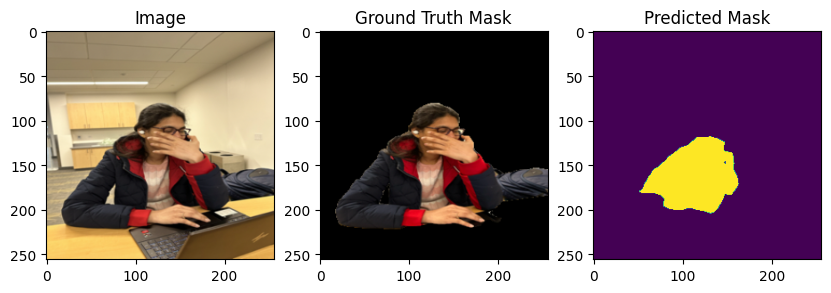

In [43]:
# Plot the images, masks, and predicted masks for the first image in the batch
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].imshow(images[0])
ax[0].set_title('Image')
ax[1].imshow(masks[0].transpose(1, 2, 0))
ax[1].set_title('Ground Truth Mask')
ax[2].imshow(predicted_masks[0])
ax[2].set_title('Predicted Mask')
plt.show()

In [106]:
import matplotlib.pyplot as plt

# Get a batch of images and masks from the validation dataloader
images, masks = next(iter(test_loader))

# Move the images and masks to the GPU if available
images = images.to(device)
masks = masks.to(device)

# Forward pass
outputs = loaded_model(images)['out']

# Get the predicted masks
_, predicted_masks = torch.max(outputs, 1)

# Convert the tensors to numpy arrays
images = images.cpu().numpy().transpose(0, 2, 3, 1)
masks = masks.squeeze().cpu().numpy()
predicted_masks = predicted_masks.squeeze().cpu().numpy()

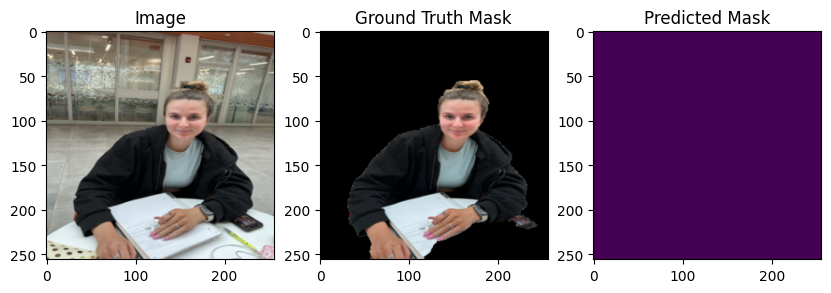

In [107]:
# Plot the images, masks, and predicted masks for the first image in the batch
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].imshow(images[0])
ax[0].set_title('Image')
ax[1].imshow(masks[0].transpose(1, 2, 0))
ax[1].set_title('Ground Truth Mask')
ax[2].imshow(predicted_masks[0])
ax[2].set_title('Predicted Mask')
plt.show()

# Model deployment

In [113]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import gradio as gr
import numpy as np

In [72]:
def my_transform_function(img):
    transform = transforms.Compose([transforms.Resize((256, 256)),transforms.ToTensor()])
    return transform(img)

In [74]:
# Load the image using PIL
image = Image.open(image_path)

# Apply your custom transform function
transformed_image = my_transform_function(image)

In [ ]:
def sepia(input_img):
    data = predict_single_frame(input_img)
    output = Image.fromarray(data)
    return output


demo = gr.Interface(sepia, gr.Image(), "image")
demo.launch()

In [86]:
MODEL_PATH = 'project_model.pth'

In [110]:
# Instantiate your model
loaded_model = model

# Load the state_dict
model_path = 'Human_model.pth'
state_dict = torch.load(model_path, map_location=torch.device('cpu'))

# Check if the state_dict is saved with 'module.' prefix, if yes, remove the prefix
state_dict = {k.replace("module.", ""): v for k, v in state_dict.items()}

loaded_model.load_state_dict(state_dict)

# Set the model to evaluation mode
loaded_model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [111]:
import matplotlib.pyplot as plt

# Get a batch of images and masks from the validation dataloader
images, masks = next(iter(val_loader))

# Move the images and masks to the GPU if available
images = images.to(device)
masks = masks.to(device)

# Forward pass
outputs = model(images)['out']

# Get the predicted masks
_, predicted_masks = torch.max(outputs, 1)

# Convert the tensors to numpy arrays
images = images.cpu().numpy().transpose(0, 2, 3, 1)
masks = masks.squeeze().cpu().numpy()
predicted_masks = predicted_masks.squeeze().cpu().numpy()

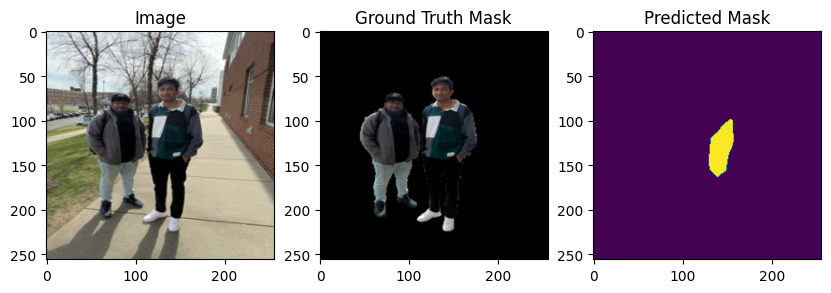

In [112]:
# Plot the images, masks, and predicted masks for the first image in the batch
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].imshow(images[0])
ax[0].set_title('Image')
ax[1].imshow(masks[0].transpose(1, 2, 0))
ax[1].set_title('Ground Truth Mask')
ax[2].imshow(predicted_masks[0])
ax[2].set_title('Predicted Mask')
plt.show()

# Mini Network

In [27]:
import torch.nn as nn

class MiniNet(nn.Module):
    def __init__(self):
        super(MiniNet, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        
        self.conv4 = nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        
        self.conv5 = nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu5 = nn.ReLU()
        
        self.conv6 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.relu6 = nn.ReLU()
        self.pool6 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.fc6 = nn.Linear(in_features=512, out_features=3)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        
        x = self.conv4(x)
        x = self.relu4(x)
        
        x = self.conv5(x)
        x = self.relu5(x)
        
        x = self.conv6(x)
        x = self.relu6(x)
        x = self.pool6(x)
        
        x = self.flatten(x)
        x = self.fc6(x)
        
        return x

In [29]:
# Define the model
model = MiniNet().to(device)
model

MiniNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (conv4): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (conv5): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu5): ReLU()
  (conv6): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu6): ReLU()
  (pool6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc6): Linear(in_features=512, out_features=10, bias=True)
)

In [34]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader


# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Define the device to train on
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)



# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader):
        # Get the inputs and labels
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimizer step
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # Print every 100 batches
            print('[Epoch %d, Batch %d] Loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

In [36]:
# Validate the model for the specified number of epochs
num_epochs = 4
t_loss = []
for epoch in range(num_epochs):
    train_loss = 0.0
    correct_pixels = 0
    total_pixels = 0

    # Set the model to eval mode
    model.train()

    # Loop over the mini-batches of the Validation data
    for batch_idx, (images, masks) in enumerate(train_loader):
        # Move the images and masks to the GPU if available
        images = images.to(device)
        masks = masks.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)['out']

        # Calculate the loss
        loss = criterion(outputs, masks.argmax(dim=1))

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

        # Calculate the number of correctly classified pixels and total pixels
        _, predicted = torch.max(outputs, 1)
        correct_pixels += (predicted == masks.argmax(dim=1)).sum().item()
        total_pixels += torch.numel(masks)

        # Calculate the training loss
        train_loss += loss.item()

    # Calculate the training accuracy
    train_accuracy = correct_pixels / total_pixels

    # Normalize the training loss by the number of mini-batches
    train_loss /= len(train_loader)
    t_loss.append(train_loss)

    # Step the learning rate scheduler
    lr_scheduler.step()
    

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Current Learning Rate: {lr_scheduler.get_last_lr()[0]:.6f}")

Epoch 1/4, Train Loss: 0.5270, Train Accuracy: 0.2659, Current Learning Rate: 0.001000
Epoch 2/4, Train Loss: 0.1631, Train Accuracy: 0.3112, Current Learning Rate: 0.000100
Epoch 3/4, Train Loss: 0.1309, Train Accuracy: 0.3161, Current Learning Rate: 0.000100
Epoch 4/4, Train Loss: 0.1160, Train Accuracy: 0.3192, Current Learning Rate: 0.000100


In [37]:
x_loss = [0.5270,0.1631,0.1309,0.1160]

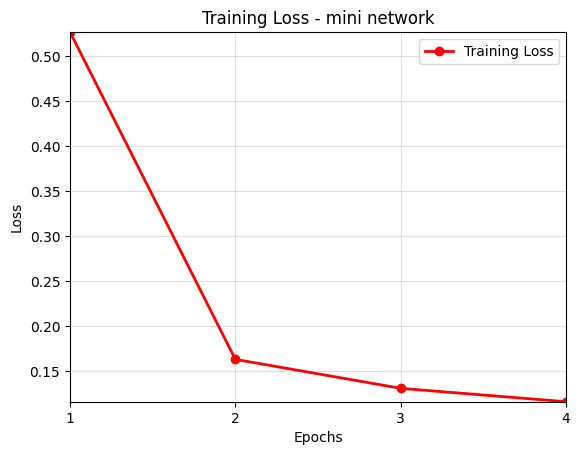

In [40]:
import matplotlib.pyplot as plt


# Plot the training loss
plt.plot(x_loss, marker='o', linestyle='-', linewidth=2, markersize=6, color='red', label='Training Loss')

# Add a title
plt.title('Training Loss - mini network')

# Add x and y labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add a grid
plt.grid(alpha=0.4)

# Add a legend
plt.legend()

# Customize the plot's appearance
plt.xticks(range(len(x_loss)), [str(x) for x in range(1, len(x_loss) + 1)])


# Set the axis limits
plt.xlim(0, len(x_loss)-1)
plt.ylim(min(x_loss), max(x_loss))

# Show the plot
plt.show()

In [41]:
# Set the model to evaluation mode
model.eval()

# Disable gradient computation
with torch.no_grad():
    test_loss = 0.0
    test_accuracy = 0.0
    
    for images, masks in test_loader:
        # Move the images and masks to the GPU if available
        images = images.to(device)
        masks = masks.to(device)

        # Forward pass
        outputs = model(images)['out']

        # Calculate the test loss and accuracy
        test_loss = criterion(outputs, masks.argmax(dim=1)).item()
        _, predicted = torch.max(outputs, 1)
        total_pixels += torch.numel(masks)
        correct_pixels += (predicted == masks.argmax(dim=1)).sum().item()

    # Normalize the test loss and accuracy by the number of mini-batches
    test_accuracy = correct_pixels / total_pixels

    # Print out the tensor sizes after the loop
    print(f"Image shape: {images.shape},\n Mask shape: {masks.shape},\n Predicted mask shape: {predicted.shape}")

    print(f"Test Loss: {test_loss:.4f},\n Test Accuracy: {test_accuracy:.4f}")

Image shape: torch.Size([5, 3, 256, 256]),
 Mask shape: torch.Size([5, 3, 256, 256]),
 Predicted mask shape: torch.Size([5, 256, 256])
Test Loss: 0.1281,
 Test Accuracy: 0.3194


In [43]:
import matplotlib.pyplot as plt

# Get a batch of images and masks from the validation dataloader
images, masks = next(iter(val_loader))

# Move the images and masks to the GPU if available
images = images.to(device)
masks = masks.to(device)

# Forward pass
outputs = model(images)['out']

# Get the predicted masks
_, predicted_masks = torch.max(outputs, 1)

# Convert the tensors to numpy arrays
images = images.cpu().numpy().transpose(0, 2, 3, 1)
masks = masks.squeeze().cpu().numpy()
predicted_masks = predicted_masks.squeeze().cpu().numpy()

### the output predication for mini network.

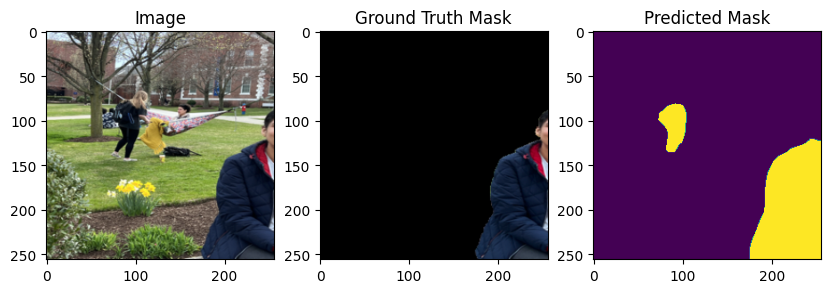

In [44]:
# Plot the images, masks, and predicted masks for the first image in the batch
fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].imshow(images[0])
ax[0].set_title('Image')
ax[1].imshow(masks[0].transpose(1, 2, 0))
ax[1].set_title('Ground Truth Mask')
ax[2].imshow(predicted_masks[0])
ax[2].set_title('Predicted Mask')
plt.show()

### Thank you